In [1]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_Panel'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    

Toggle code

var_type (8079, 14)
Wall time: 16.2 s


In [2]:
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

In [9]:
mean_lr_scales = BES_Panel[search(BES_Panel,"lr_scale").index].apply(lambda x: x.cat.codes).replace(-1,np.nan).mean(axis=1)
mean_al_scales = BES_Panel[search(BES_Panel,"al_scale").index].apply(lambda x: x.cat.codes).replace(-1,np.nan).mean(axis=1)

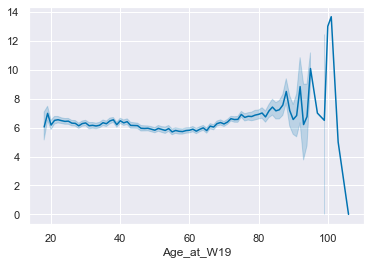

In [14]:
sns.lineplot(x=pan_dataset_ages["Age_at_W19"].round().astype('int'),y=mean_lr_scales)

In [13]:
pan_dataset_ages["Age_at_W19"].round()

id
1        64.0
2        68.0
3        82.0
4        57.0
5        74.0
         ... 
98447    29.0
98448    30.0
98449    36.0
98450    26.0
98451    44.0
Name: Age_at_W19, Length: 97006, dtype: float64

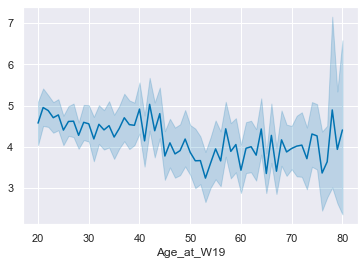

In [23]:
rounded_ages = pan_dataset_ages["Age_at_W19"].round().astype('int')
mask = (mean_al_scales<=mean_al_scales.quantile(.1)) & (rounded_ages>=20) & (rounded_ages <=80)

sns.lineplot(x=rounded_ages[mask],y=mean_lr_scales[mask]);

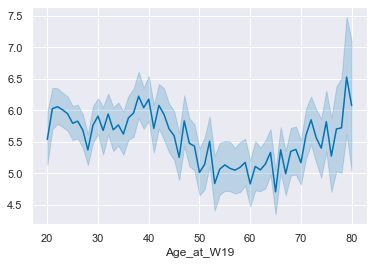

In [21]:
rounded_ages = pan_dataset_ages["Age_at_W19"].round().astype('int')
mask = (mean_al_scales<=mean_al_scales.quantile(.3)) & (rounded_ages>=20) & (rounded_ages <=80)

sns.lineplot(x=rounded_ages[mask],y=mean_lr_scales[mask]);

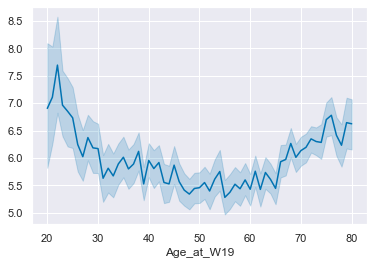

In [22]:
rounded_ages = pan_dataset_ages["Age_at_W19"].round().astype('int')
mask = (mean_al_scales>=mean_al_scales.quantile(.7)) & (rounded_ages>=20) & (rounded_ages <=80)

sns.lineplot(x=rounded_ages[mask],y=mean_lr_scales[mask]);

id
1        (16.0, 17.667]
2         (8.5, 10.143]
3          (13.0, 14.0]
4          (15.0, 16.0]
5        (10.143, 12.0]
              ...      
98447        (6.0, 8.5]
98448     (-0.001, 6.0]
98449        (6.0, 8.5]
98450    (10.143, 12.0]
98451    (16.0, 17.667]
Length: 97006, dtype: category
Categories (10, interval[float64]): [(-0.001, 6.0] < (6.0, 8.5] < (8.5, 10.143] < (10.143, 12.0] ... (14.0, 15.0] < (15.0, 16.0] < (16.0, 17.667] < (17.667, 20.0]]

Wall time: 31.1 s


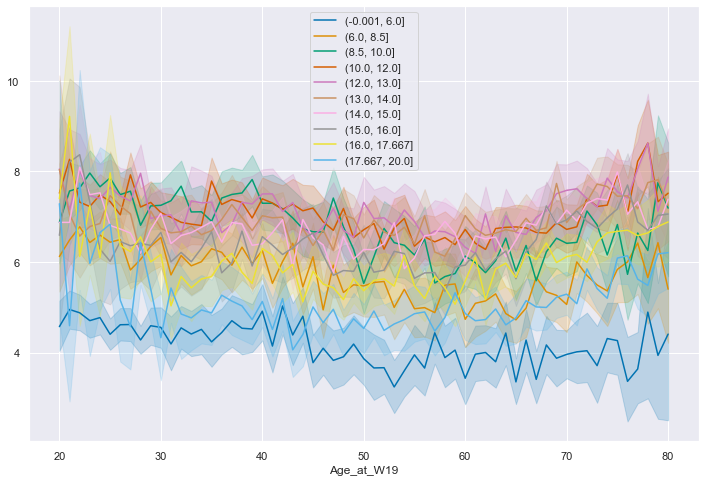

In [30]:
%%time
rounded_ages = pan_dataset_ages["Age_at_W19"].round().astype('int')
mask = (rounded_ages>=20) & (rounded_ages <=80)
plt.figure(figsize=(12,8))
sns.lineplot(x=rounded_ages[mask],y=mean_lr_scales[mask],
             hue=pd.qcut(mean_al_scales[mask],q=10),hue_order = pd.qcut(mean_al_scales[mask],q=10).cat.categories);

Wall time: 8.04 s


Text(0.5, 1.0, 'Economic Left-Right Values based on when you were 18\nSplit by Social Liberal/Authoritarian values\nBritish Election Study data (unweighted!)')

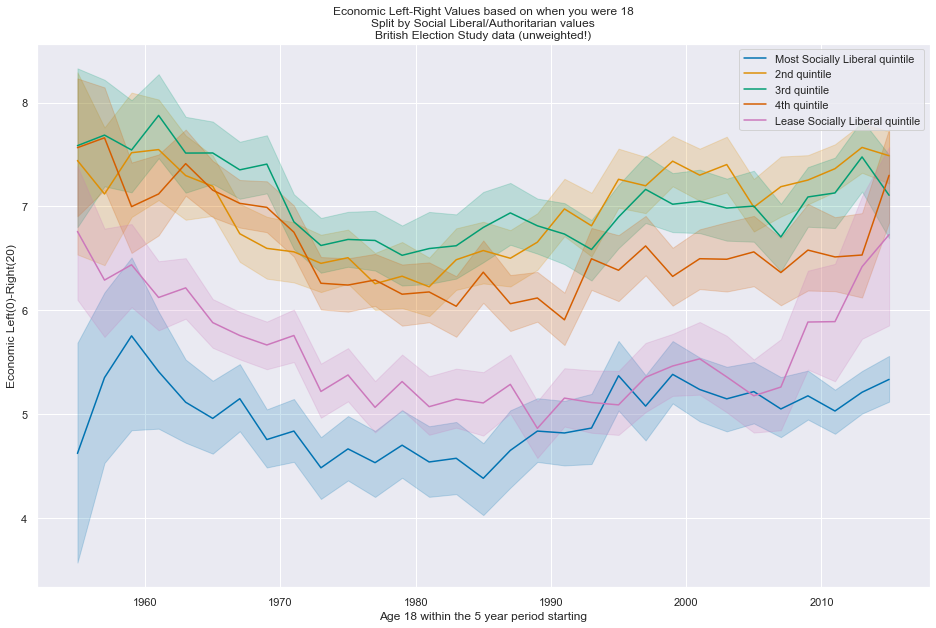

In [47]:
%%time
q=5
age_granularity=2
rounded_ages = (pan_dataset_ages["Age_at_W10"]/age_granularity).round().astype('int')*age_granularity
mask = (rounded_ages>=20) & (rounded_ages <=80)
rounded_ages = 2017-rounded_ages+18
al_groups = pd.qcut(mean_al_scales[mask],q=q).cat.rename_categories(["Most Socially Liberal quintile","2nd quintile","3rd quintile","4th quintile","Lease Socially Liberal quintile"])
plt.figure(figsize=(16,10));
sns.lineplot(x=rounded_ages[mask],y=mean_lr_scales[mask],
             hue=al_groups,hue_order = al_groups.cat.categories);
plt.ylabel("Economic Left(0)-Right(20)");
plt.xlabel("Age 18 within the 5 year period starting");
plt.title("Economic Left-Right Values based on when you were 18\nSplit by Social Liberal/Authoritarian values\nBritish Election Study data (unweighted!)")

Wall time: 4 s


Text(0.5, 0, 'Age 18 within the 5 year period starting')

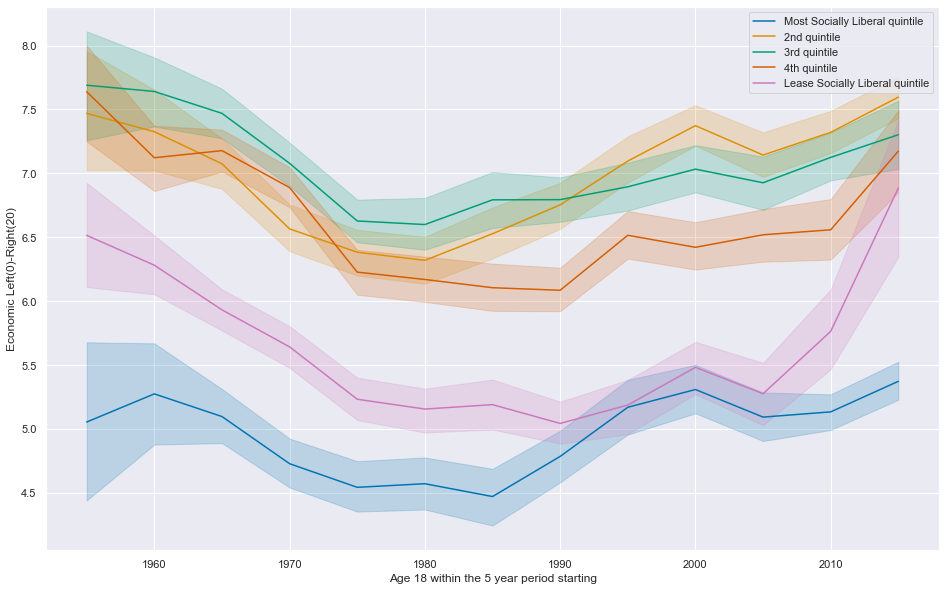

In [46]:
%%time
q=5
age_granularity=5
rounded_ages = (pan_dataset_ages["Age_at_W10"]/age_granularity).round().astype('int')*age_granularity
mask = (rounded_ages>=20) & (rounded_ages <=80)
rounded_ages = 2017-rounded_ages+18
al_groups = pd.qcut(mean_al_scales[mask],q=q).cat.rename_categories(["Most Socially Liberal quintile","2nd quintile","3rd quintile","4th quintile","Least Socially Liberal quintile"])
plt.figure(figsize=(16,10));
sns.lineplot(x=rounded_ages[mask],y=mean_lr_scales[mask],
             hue=al_groups,hue_order = al_groups.cat.categories);
plt.ylabel("Economic Left(0)-Right(20)");
plt.xlabel("Age 18 within the 5 year period starting");
plt.title("Economic Left-Right Values based on when you were 18\nSplit by Social Liberal/Authoritarian values\nBritish Election Study data (unweighted!)")

Wall time: 4.14 s


Text(0.5, 1.0, 'Social Liberal-Authoritarian Values based on when you were 18\nSplit by Economic Left-Right values\nBritish Election Study data (unweighted!)')

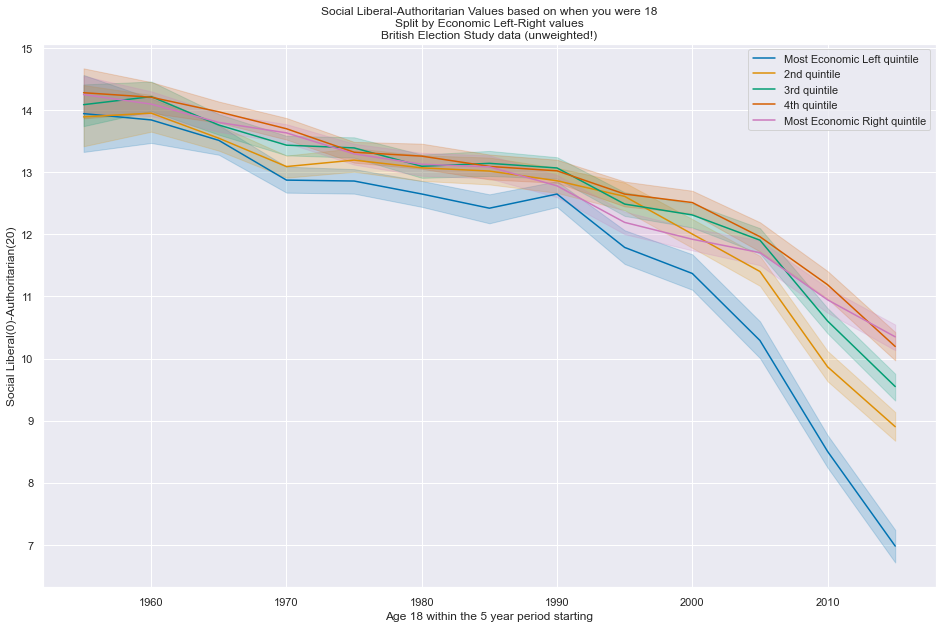

In [50]:
%%time
q=5
age_granularity=5
rounded_ages = (pan_dataset_ages["Age_at_W10"]/age_granularity).round().astype('int')*age_granularity
mask = (rounded_ages>=20) & (rounded_ages <=80)
rounded_ages = 2017-rounded_ages+18
lr_groups = pd.qcut(mean_lr_scales[mask],q=q).cat.rename_categories(["Most Economic Left quintile","2nd quintile","3rd quintile","4th quintile","Most Economic Right quintile"])
plt.figure(figsize=(16,10));
sns.lineplot(x=rounded_ages[mask],y=mean_al_scales[mask],
             hue=lr_groups,hue_order = lr_groups.cat.categories);
plt.ylabel("Social Liberal(0)-Authoritarian(20)");
plt.xlabel("Age 18 within the 5 year period starting");
plt.title("Social Liberal-Authoritarian Values based on when you were 18\nSplit by Economic Left-Right values\nBritish Election Study data (unweighted!)")